In [8]:
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
def codeToReadTxtFile1(filename):

    epoch_num = 0
    accuracy = 0
    precision = 0
    recall = 0
    f1 = 0
    outer_dictionary = {}
    dictionary = {}
    with open(filename, 'r') as file:
        lines = file.readlines()
        for i in range(len(lines)):

            line = lines[i].split()
            if (i%2 == 0):
                dictionary = {}

                epoch_num = int(line[1].split('/')[0])
                accuracy = float(line[7].split('%')[0])
                dictionary['train_accuracy'] = accuracy
                precision = float(line[10].split(',')[0])
                dictionary['train_precision'] = precision
                recall = float(line[13].split(',')[0])
                dictionary['train_recall'] = recall
                f1 = float(line[16])
                dictionary['train_f1'] = f1
                # print(epoch_num, accuracy, precision, recall, f1)

            else:
                
                accuracy = float(line[5].split('%')[0])
                dictionary['val_accuracy'] = accuracy
                precision = float(line[8].split(',')[0])
                dictionary['val_precision'] = precision
                recall = float(line[11].split(',')[0])
                dictionary['val_recall'] = recall
                f1 = float(line[14])
                dictionary['val_f1'] = f1

                outer_dictionary[epoch_num] = dictionary
    
    return outer_dictionary

In [10]:
def codeToReadTxtFile(filename):
    outer_dictionary = {}
    with open(filename, 'r') as file:
        lines = file.readlines()
        for i in range(0, len(lines), 2):  # Step 2 to process every other line
            epoch_num = int(lines[i].split('/')[0].split()[-1])
            train_accuracy = float(lines[i].split()[-1][:-1])
            val_accuracy = float(lines[i + 1].split()[-1][:-1])

            outer_dictionary[epoch_num] = {'train_accuracy': train_accuracy, 'val_accuracy': val_accuracy}
    return outer_dictionary


In [11]:
def codeToPlot1(df, column1, column2, path):

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[column1], label=column1, marker='o', color='blue')
    plt.plot(df.index, df[column2], label=column2, marker='o', color='green')

    # Add titles and labels
    plt.title(f'Line Chart of {column1} and {column2}')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.ylim(10, 28)
    # Add a legend
    plt.legend()

    plt.savefig(path)
    # Show the plot
    plt.show()

In [12]:
def codeToPlot(df, column1, column2, path):

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[column1], label=column1, marker='o', color='blue')
    plt.plot(df.index, df[column2], label=column2, marker='o', color='green')

    # Add titles and labels
    plt.title(f'Line Chart of {column1} and {column2}')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.ylim(10, 28)
    # Add a legend
    plt.legend()

    plt.savefig(path)
    # Show the plot
    plt.show()

In [13]:
df = pd.DataFrame.from_dict(codeToReadTxtFile("WithoutCOTRM.txt"), orient='index')
df

,train_accuracy,train_precision,train_recall,train_f1,val_accuracy,val_precision,val_recall,val_f1
1,18.645833,0.065207,0.186458,0.095552,19.375000,0.037820,0.193750,0.063286
2,17.395833,0.068033,0.173958,0.094599,17.291667,0.029900,0.172917,0.050984
3,19.166667,0.069035,0.191667,0.101025,18.020833,0.067810,0.180208,0.066745
4,18.125000,0.068995,0.181250,0.099903,17.187500,0.029541,0.171875,0.050417
5,20.208333,0.078372,0.202083,0.112843,18.750000,0.035156,0.187500,0.059211
6,22.083333,0.088755,0.220833,0.125908,20.208333,0.040838,0.202083,0.067945
7,20.312500,0.075134,0.203125,0.109265,17.812500,0.031729,0.178125,0.053863
8,19.375000,0.074676,0.193750,0.107803,17.916667,0.032101,0.179167,0.054446
9,19.270833,0.073688,0.192708,0.106607,20.208333,0.040838,0.202083,0.067945
10,18.750000,0.072043,0.187500,0.104069,19.895833,0.039584,0.198958,0.066031


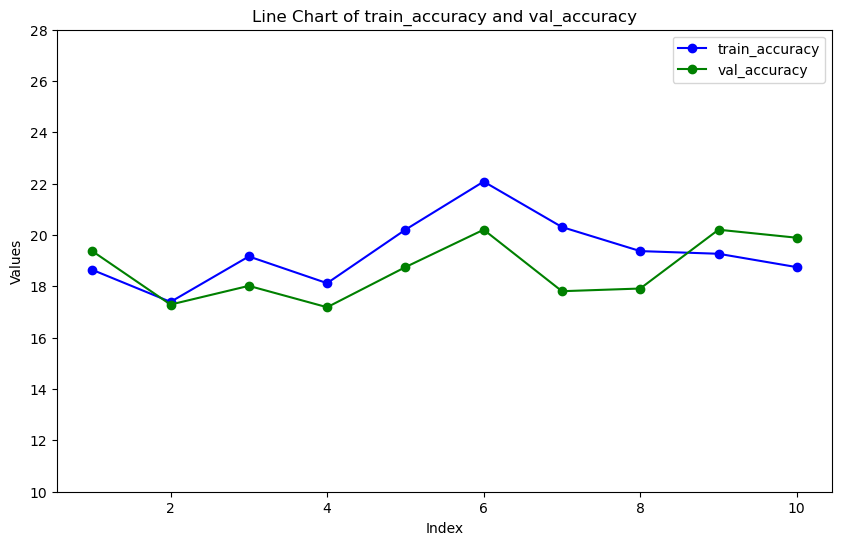

In [14]:
codeToPlot(df, 'train_accuracy', 'val_accuracy', 'accuracy_plot_WithCoTRM_noViTBERT.png')